Package requirements:
- PRAW: http://praw.readthedocs.io/en/latest/index.html
- seaborn (optional, for plotting)
- tqdm (optional, for progress bar)

Additional setup:
- Create a file `crypto-social-analysis/configs/auth.ini` with a `[reddit]` section with your API access information.

In [1]:
from __future__ import print_function, division, absolute_import

%matplotlib inline
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
csa_dir = os.pardir
sys.path.append(os.path.join(csa_dir, 'src'))

import crypto_social_analysis as csa

from ConfigParser import ConfigParser
import praw

# from google.cloud import language

# key to use in coin_dict
sr_list_str = 'subreddit_list'
# unit of subreddit traffic to retrieve ('day', 'month', 'hour')
time_unit = 'day'

In [2]:
# read configuration
config = ConfigParser()
config.read(os.path.join(csa_dir, 'configs/auth.ini'));

# connect
if config.has_section('reddit'):
    reddit = praw.Reddit(client_id=config.get('reddit', 'client_id'),
                         client_secret=config.get('reddit', 'client_secret'),
                         user_agent=config.get('reddit', 'user_agent'),
                         username=config.get('reddit', 'username'),
                         password=config.get('reddit', 'password'),
                        )
else:
    print('No reddit configuration found.')

# print(reddit.user.me())

In [3]:
# Retrieve coin list to get numerical IDs
coin_list_data = csa.get_coin_list()

In [4]:
# coin_list_data contains a bunch of info about each coin
coin_list_data['Data'].keys()[:5]

[u'RATIO', u'CPC', u'RYC', u'XBS', u'IXC']

In [5]:
coin_list = ['BTC', 'ETH', 'XMR', 'DCR']

# Initialize coin_dict with additional "unofficial" subreddits
coin_dict = {
    'XMR':
        {sr_list_str:
            ['xmrtrader']
        }
}

df_coins = csa.get_coin_stats_price(coin_list, coin_list_data, reddit, coin_dict)

Getting social info for BTC
Getting subreddit info for BTC: /r/bitcoin


  0%|          | 0/57 [00:00<?, ?it/s]

Getting historical price info for ['BTC']: 2016-12-20 to 2017-02-14


100%|██████████| 57/57 [00:42<00:00,  1.35it/s]


Getting social info for ETH


  0%|          | 0/57 [00:00<?, ?it/s]

Getting subreddit info for ETH: /r/ethereum
Getting historical price info for ['ETH']: 2016-12-20 to 2017-02-14


100%|██████████| 57/57 [00:40<00:00,  1.46it/s]


Getting social info for XMR
Getting subreddit info for XMR: /r/xmrtrader
Getting subreddit info for XMR: /r/monero


  0%|          | 0/57 [00:00<?, ?it/s]

Getting historical price info for ['XMR']: 2016-12-20 to 2017-02-14


100%|██████████| 57/57 [00:41<00:00,  1.45it/s]


Getting social info for DCR
Getting subreddit info for DCR: /r/decred


  0%|          | 0/57 [00:00<?, ?it/s]

No traffic information found for DCR: /r/decred
Getting historical price info for ['DCR']: 2016-12-20 to 2017-02-14


100%|██████████| 57/57 [00:44<00:00,  1.23it/s]


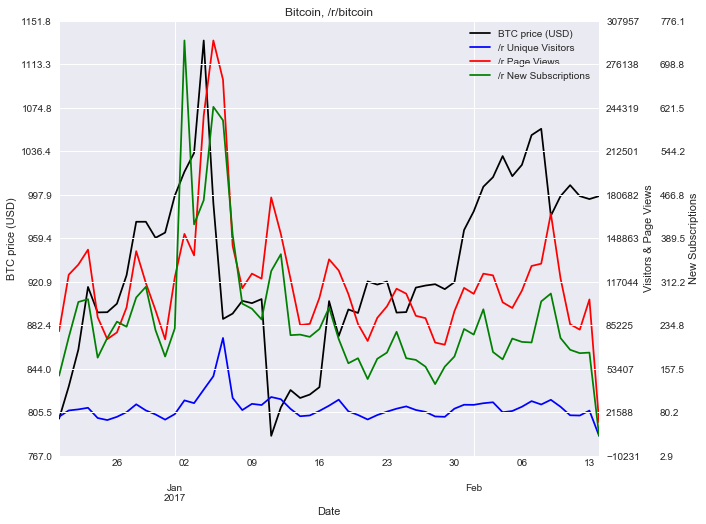

In [6]:
coin = 'BTC'

csa.plot_coin_reddit_price(df_coins, coin_dict, coin)

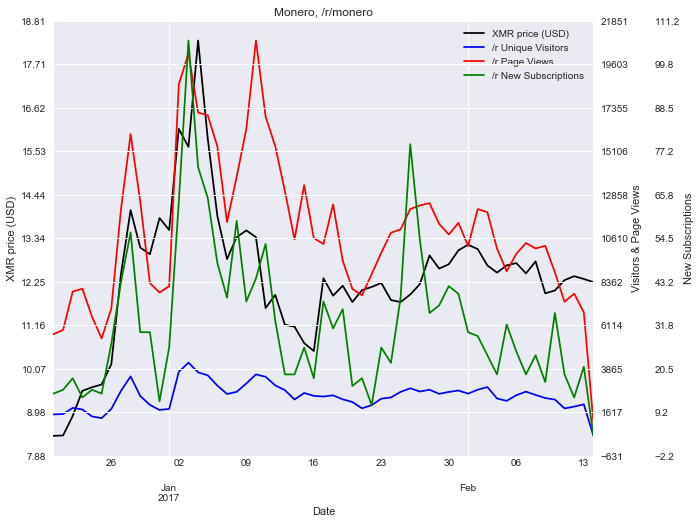

In [7]:
coin = 'XMR'

csa.plot_coin_reddit_price(df_coins, coin_dict, coin, subreddit_list=['monero']);

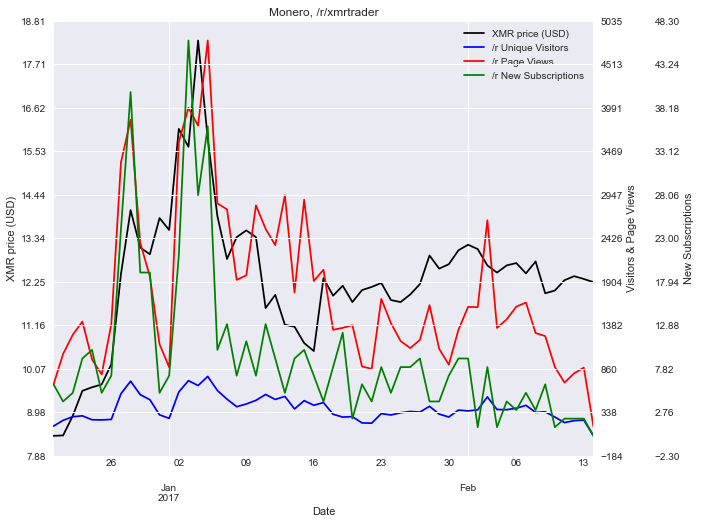

In [8]:
coin = 'XMR'

csa.plot_coin_reddit_price(df_coins, coin_dict, coin, subreddit_list=['xmrtrader']);

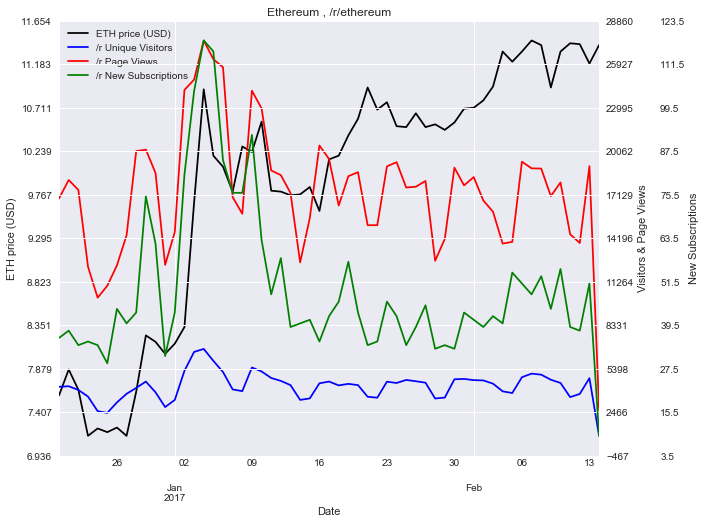

In [9]:
coin = 'ETH'

csa.plot_coin_reddit_price(df_coins, coin_dict, coin)

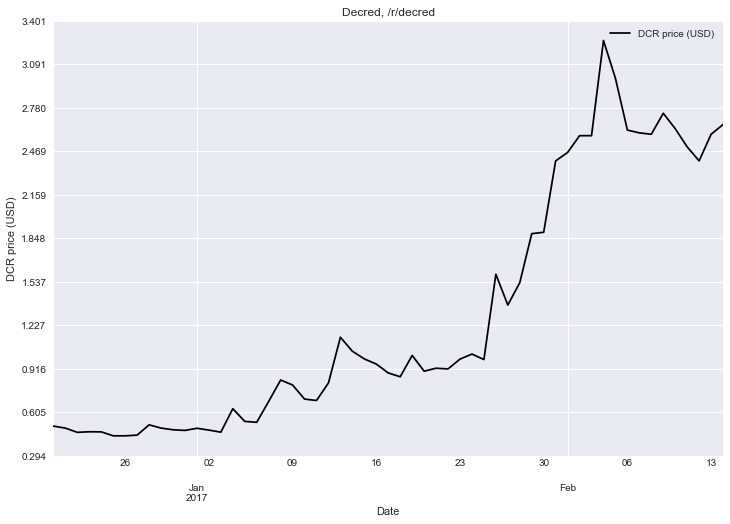

In [10]:
coin = 'DCR'

csa.plot_coin_reddit_price(df_coins, coin_dict, coin)